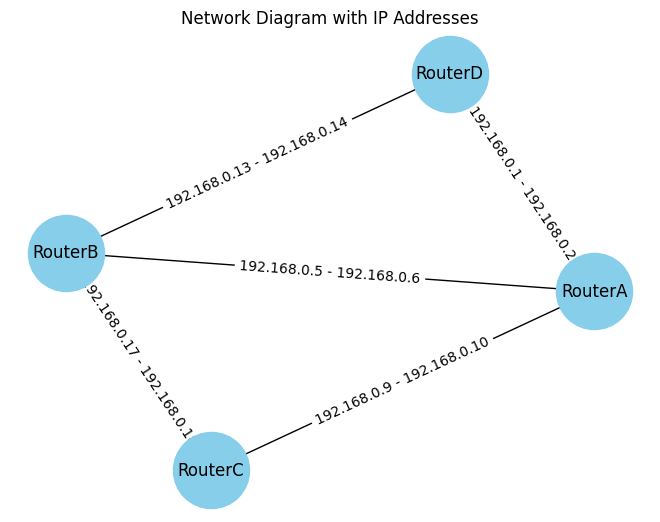

In [7]:
import matplotlib.pyplot as plt
import networkx as nx

# Create an empty graph
G = nx.Graph()

# Add nodes for the routers
routers = ['RouterA', 'RouterB', 'RouterC', 'RouterD']
G.add_nodes_from(routers)

# Add edges with their IP address labels
edges = [
    ('RouterA', 'RouterD', {"label": "192.168.0.1 - 192.168.0.2"}),
    ('RouterA', 'RouterB', {"label": "192.168.0.5 - 192.168.0.6"}),
    ('RouterA', 'RouterC', {"label": "192.168.0.9 - 192.168.0.10"}),
    ('RouterB', 'RouterD', {"label": "192.168.0.13 - 192.168.0.14"}),
    ('RouterB', 'RouterC', {"label": "192.168.0.17 - 192.168.0.18"}),
]
G.add_edges_from([(u, v, attr) for u, v, attr in edges])

# Draw the graph
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=3000, node_color="skyblue")

# Draw edge labels
edge_labels = nx.get_edge_attributes(G, 'label')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.title("Network Diagram with IP Addresses")
plt.show()


In [8]:
import pandas as pd
from pybatfish.client.session import Session
from pybatfish.datamodel import *
from pybatfish.datamodel.answer import *
from pybatfish.datamodel.flow import *

# Set up a connection to the batfish session
bf = Session(host="localhost")

# Assign a friendly name to your network and snapshot
NETWORK_NAME = "toy_network"
SNAPSHOT_NAME = "simple_snapshot"

SNAPSHOT_PATH = "scenarios/toy/ospf/"

# Now create the network and initialize the snapshot
bf.set_network(NETWORK_NAME)
bf.init_snapshot(SNAPSHOT_PATH, name=SNAPSHOT_NAME, overwrite=True)
bf.set_snapshot(SNAPSHOT_NAME)

# Get routing tables for all nodes and VRFs
routes_all = bf.q.routes().answer().frame()
routes_all

,Node,VRF,Network,Next_Hop,Next_Hop_IP,Next_Hop_Interface,Protocol,Metric,Admin_Distance,Tag
0,a,default,10.0.0.0/31,interface FastEthernet3/0,AUTO/NONE(-1l),FastEthernet3/0,connected,0,0,None
1,a,default,10.0.0.1/32,interface FastEthernet3/0,AUTO/NONE(-1l),FastEthernet3/0,local,0,0,None
2,a,default,10.0.0.2/31,interface FastEthernet1/0 ip 10.0.0.4,10.0.0.4,FastEthernet1/0,ospf,3,110,None
3,a,default,10.0.0.4/31,interface FastEthernet1/0,AUTO/NONE(-1l),FastEthernet1/0,connected,0,0,None
4,a,default,10.0.0.5/32,interface FastEthernet1/0,AUTO/NONE(-1l),FastEthernet1/0,local,0,0,None
5,a,default,10.0.0.6/31,interface FastEthernet2/0,AUTO/NONE(-1l),FastEthernet2/0,connected,0,0,None
6,a,default,10.0.0.7/32,interface FastEthernet2/0,AUTO/NONE(-1l),FastEthernet2/0,local,0,0,None
7,a,default,10.0.0.8/31,interface FastEthernet1/0 ip 10.0.0.4,10.0.0.4,FastEthernet1/0,ospf,5,110,None
8,a,default,10.0.0.10/31,interface FastEthernet1/0 ip 10.0.0.4,10.0.0.4,FastEthernet1/0,ospf,7,110,None
9,a,default,100.0.0.0/24,interface FastEthernet0/0,AUTO/NONE(-1l),FastEthernet0/0,connected,0,0,None


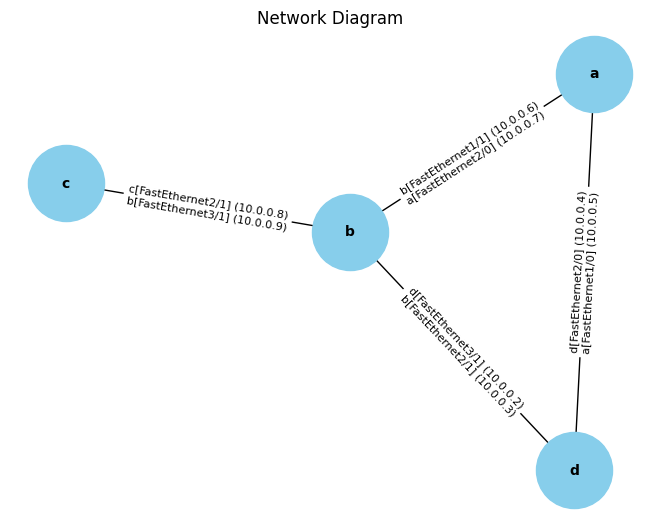

In [10]:
df = bf.q.layer3Edges().answer().frame()

# Create a NetworkX graph
G = nx.Graph()

# Add edges based on the DataFrame
for index, row in df.iterrows():
    # Extract router names from the interface strings
    router1 = row['Interface'].hostname
    router2 = row['Remote_Interface'].hostname
    
    # Add the edge with interface and IP details as attributes
    G.add_edge(router1, router2, 
               iface1=row['Interface'], 
               iface1_ip=row['IPs'][0],
               iface2=row['Remote_Interface'], 
               iface2_ip=row['Remote_IPs'][0])

# Use a consistent layout
pos = nx.spring_layout(G, seed=42)

# Draw the graph
nx.draw(G, pos, with_labels=True, node_size=3000, node_color="skyblue", font_size=10, font_weight='bold')

# Create edge labels for interface names and IP addresses
edge_labels = {}
for u, v, data in G.edges(data=True):
    label = f"{data['iface1']} ({data['iface1_ip']})\n"
    label += f"{data['iface2']} ({data['iface2_ip']})"
    edge_labels[(u, v)] = label

# Draw edge labels
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8, verticalalignment='center')

plt.title("Network Diagram")
plt.show()
